In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.chdir("/tf/notebooks")

In [2]:
import tensorflow as tf
from keras import optimizers, callbacks

from models import SiameseModel, init_network
from utils import load_data, visualise

In [3]:
print("Tensorflow version:", tf.__version__)
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Tensorflow version: 2.12.0
Num GPUs Available:  1


Found 6194 files belonging to 1 classes.
Found 6194 files belonging to 1 classes.
Found 6194 files belonging to 1 classes.


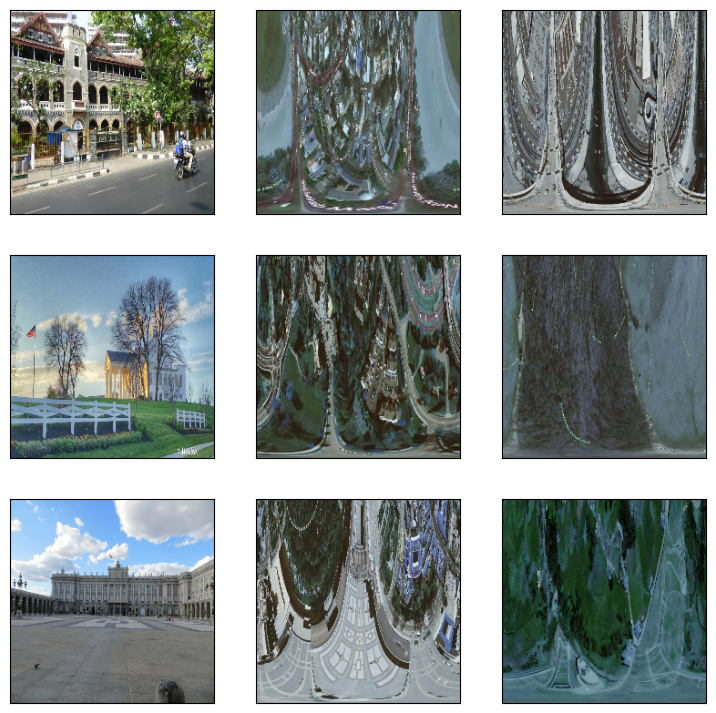

In [4]:
BATCH_SIZE = 16
train_data = load_data(batch_size=BATCH_SIZE)
visualise(*list(train_data.take(1).as_numpy_iterator())[0])

In [5]:
# Checkpoint during training
checkpoint_path = "siamese_chkpts/cp.ckpt"

network = init_network((200, 200))
model = SiameseModel(network)
model.compile(optimizer=optimizers.Adam(0.001),
              weighted_metrics=[])

In [6]:
# Create a callback that saves the model's weights
cp_callback = callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        save_weights_only=True,
                                        save_freq="epoch",
                                        verbose=1)

model.fit(train_data,
          epochs=10,
          callbacks=[cp_callback])

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/tf/notebooks/models.py", line 122, in train_step
        loss = self._compute_loss(data)
    File "/tf/notebooks/models.py", line 148, in _compute_loss
        ap_distance, an_distance = self.siamese_network(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 200, 200, 3), found shape=(None, 224, 224, 3)


In [10]:
model.save("/tf/notebooks/siamese_model")

2023-05-07 09:37:16.352098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-05-07 09:37:16.359176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-05-07 09:37:16.805080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-05-07 09:37

INFO:tensorflow:Assets written to: /tf/notebooks/siamese_model/assets


INFO:tensorflow:Assets written to: /tf/notebooks/siamese_model/assets
